In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
dt = pd.read_csv(r"C:\ANNA DSA\PROJECT\WknaT6YxR02YeXYuMDPg_water_quality.csv")

In [118]:
dt.head()

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


In [119]:
dt.shape

(19029, 24)

In [120]:
dt.describe()

,Latitude,Longitude,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI
count,1.864000e+04,1.863900e+04,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000,19029.000000
mean,1.509049e+02,4.021432e+03,2020.286195,7.713495,1191.620744,3.326689,296.774490,171.843482,68.087940,35.114294,327.843466,65.114035,40.505256,113.673866,13.465496,0.595598,723.774239,305.291789
std,1.529204e+04,5.401512e+05,1.314794,0.491413,1348.094278,15.496995,180.861685,349.922000,148.853626,55.488528,310.386082,62.018322,49.654295,200.551600,38.839328,1.818577,755.575601,315.477116
min,0.000000e+00,0.000000e+00,2019.000000,2.800000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-0.160000,15.000000,9.043604
25%,1.998330e+01,2.522500e+01,2019.000000,7.450000,524.000000,0.000000,177.000000,32.000000,13.000000,4.460000,165.000000,28.100000,15.000000,28.000000,1.700000,0.206000,345.000000,146.642420
50%,2.417842e+01,7.617500e+01,2020.000000,7.720000,860.000000,0.000000,281.000000,78.000000,30.790000,18.000000,260.000000,50.100000,29.000000,60.400000,3.630000,0.430000,587.000000,232.078880
75%,7.571110e+01,7.953710e+01,2022.000000,8.000000,1390.000000,0.000000,390.400000,175.000000,69.000000,43.000000,400.000000,80.000000,49.800000,121.000000,9.510000,0.770000,913.000000,359.718240
max,2.087833e+06,7.374400e+07,2022.000000,10.920000,26520.000000,368.000000,3112.000000,9217.000000,7601.000000,1534.900000,8606.880000,1840.000000,1483.500000,5489.000000,1353.000000,168.000000,17768.000000,6850.888720


In [121]:
dt.isna().sum()

Well_ID                         3785
State                              0
District                           0
Block                           1119
Village                            1
Latitude                         389
Longitude                        390
Year                               0
pH                                 0
EC                                 0
CO3                                0
HCO3                               0
Cl                                 0
SO4                                0
NO3                                0
TH                                 0
Ca                                 0
Mg                                 0
Na                                 0
K                                  0
F                                  0
TDS                                0
WQI                                0
Water Quality Classification       0
dtype: int64

In [122]:
dt.columns

Index(['Well_ID', 'State', 'District', 'Block', 'Village', 'Latitude',
       'Longitude', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS', 'WQI',
       'Water Quality Classification'],
      dtype='object')

print(dt['Water Quality Classification'].value_counts())

# Example: Bin into 3 broader categories
dt['WQ_Class'] = dt['Water Quality Classification'].replace({
    'Excellent': 'Good',
    'Good': 'Good',
    'Very Poor yet Drinkable': 'Moderate',
    'Poor': 'Unhealthy for Sensitive Groups',
    'Unsuitable for Drinking': 'Poor'
})

print(dt['WQ_Class'].value_counts())

In [123]:
dt.duplicated().value_counts()

False    19022
True         7
Name: count, dtype: int64

In [124]:
dt = dt.drop_duplicates()

In [125]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19022 entries, 0 to 19028
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well_ID                       15237 non-null  object 
 1   State                         19022 non-null  object 
 2   District                      19022 non-null  object 
 3   Block                         17905 non-null  object 
 4   Village                       19021 non-null  object 
 5   Latitude                      18633 non-null  float64
 6   Longitude                     18632 non-null  float64
 7   Year                          19022 non-null  int64  
 8   pH                            19022 non-null  float64
 9   EC                            19022 non-null  float64
 10  CO3                           19022 non-null  float64
 11  HCO3                          19022 non-null  float64
 12  Cl                            19022 non-null  float64
 13  SO4   

In [126]:
dt.columns

Index(['Well_ID', 'State', 'District', 'Block', 'Village', 'Latitude',
       'Longitude', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS', 'WQI',
       'Water Quality Classification'],
      dtype='object')

In [127]:
dt = dt.drop(['Well_ID', 'State', 'District', 'Block', 'Village', 'Latitude',
       'Longitude', 'Year','Water Quality Classification'], axis=1)

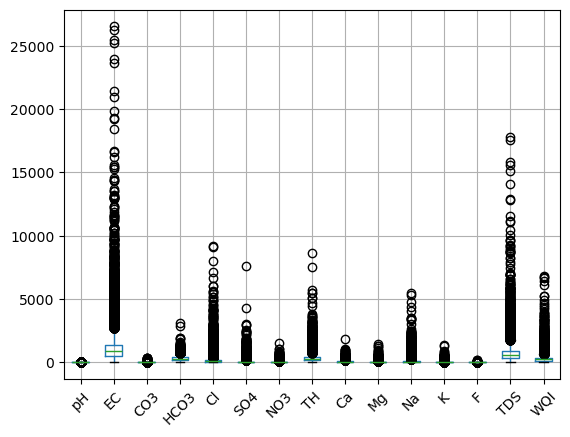

In [128]:
dt.boxplot()
plt.xticks(rotation = 45)
plt.show()

In [129]:
def remove_outliers(dt, column):
    
    Q1 = dt[column].quantile(0.25)
    Q3 = dt[column].quantile(0.75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dt[column] = dt[column].clip(upper = upper_bound)
    dt[column] = dt[column].clip(lower = lower_bound)
        
    return dt[column]

In [130]:
for col in dt:
    dt[col] = remove_outliers(dt, col)

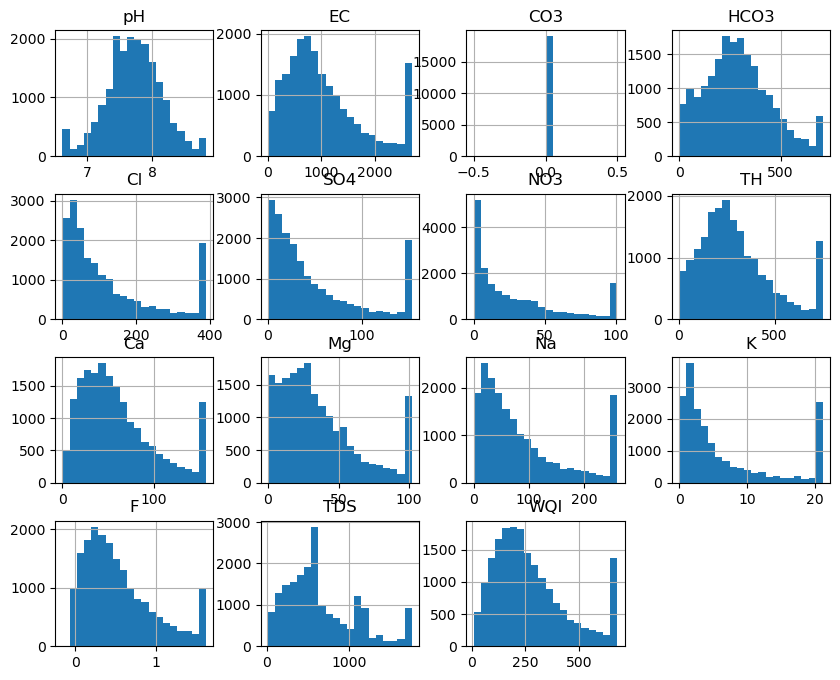

In [131]:
num_dt = dt.select_dtypes(include = "number")
num_cols = num_dt.columns.to_list()

# Create histograms for each numeric column with smaller size and grid layout
dt.hist(column=num_cols, figsize=(10, 8), bins=20)

plt.show()

In [132]:
print(dt[num_cols].skew())

pH     -0.072165
EC      0.943741
CO3     0.000000
HCO3    0.479390
Cl      1.164066
SO4     1.127020
NO3     1.141595
TH      0.856334
Ca      0.928083
Mg      0.992792
Na      1.093856
K       1.171374
F       0.962748
TDS     0.911260
WQI     0.918721
dtype: float64


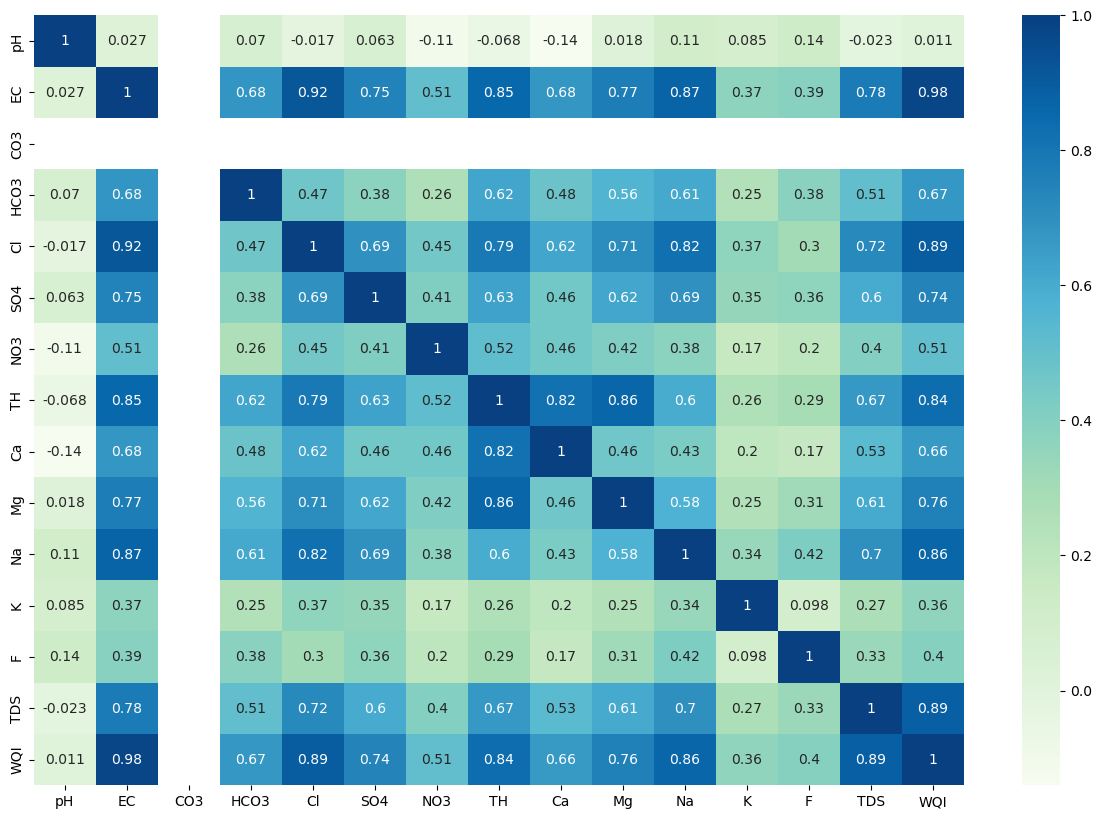

In [133]:
corr_matrix = dt.corr()

plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu')
plt.show()

In [134]:
dt = dt.drop('EC', axis = 1)

In [135]:
dt.shape

(19022, 14)

In [136]:
dt.columns

Index(['pH', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na', 'K',
       'F', 'TDS', 'WQI'],
      dtype='object')

In [137]:
result = {'Models:' : [],
          'MSE:' : [],
          'R2' : []
        }
result_dt = pd.DataFrame(result)
result_dt

,Models:,MSE:,R2


In [138]:
from sklearn.model_selection import train_test_split

In [139]:
x = dt.drop('WQI', axis = 1)
y = dt['WQI']

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [141]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

pred1 = lr.predict(x_test)

In [142]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, pred1))
print('R = Squared Value: ', r2_score(y_test, pred1) )

Mean_Squared_Error: 622.165641588236
R = Squared Value:  0.9800361229285321


In [143]:
result_dt.loc[len(result_dt)] = ["Linear Regression", mean_squared_error(y_test, pred1), r2_score(y_test, pred1)]

In [144]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

pred2 = lr.predict(x_test_poly)

In [145]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred2))
print('R = Squared Value: ', r2_score(y_test, pred2))

Mean_Squared_Error: 457.84634967123816
R = Squared Value:  0.9853087544032105


In [146]:
result_dt.loc[len(result_dt)] = ["Polynomial Regression", mean_squared_error(y_test, pred2), r2_score(y_test, pred2)]

In [147]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

pred3 = rf_model.predict(x_test)

In [148]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred3))
print('R = Squared Value: ', r2_score(y_test, pred3) )

Mean_Squared_Error: 279.6283997712401
R = Squared Value:  0.9910273621274334


In [149]:
result_dt.loc[len(result_dt)] = ["Random Forest Regressor", mean_squared_error(y_test, pred3), r2_score(y_test, pred3)]

In [150]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1) 

lasso.fit(x_train, y_train)
pred4 = lasso.predict(x_test)

In [151]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred4))
print('R = Squared Value: ', r2_score(y_test, pred4) )

Mean_Squared_Error: 622.1769810153152
R = Squared Value:  0.980035759072168


In [152]:
result_dt.loc[len(result_dt)] = ["Lasso Regression", mean_squared_error(y_test, pred4), r2_score(y_test, pred4)]

In [153]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

ridge.fit(x_train, y_train)
pred5 = ridge.predict(x_test)

In [154]:
print('Mean_Squared_Error:', mean_squared_error(y_test, pred5))
print('R = Squared Value: ', r2_score(y_test, pred5) )

Mean_Squared_Error: 622.1656212896884
R = Squared Value:  0.9800361235798662


In [155]:
result_dt.loc[len(result_dt)] = ["Ridge Regression", mean_squared_error(y_test, pred5), r2_score(y_test, pred5)]

In [156]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X1 = std_scaler.fit_transform(x)
X1 = pd.DataFrame(X1)

In [157]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(X1,y,test_size = 0.25, random_state=42)

In [158]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x1_train, y_train)

y_pred1 = lr.predict(x1_test)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred1))
print('R = Squared Value: ', r2_score(y_test, y_pred1) )

Mean_Squared_Error: 622.1656415882363
R = Squared Value:  0.9800361229285321


In [160]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (0,1))
X2 = min_max_scaler.fit_transform(x)
X2 = pd.DataFrame(X2)

In [161]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y_train, y_test = train_test_split(X2,y,test_size = 0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x2_train, y_train)

y_pred2 = lr.predict(x2_test)

In [162]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred2))
print('R = Squared Value: ', r2_score(y_test, y_pred2) )

Mean_Squared_Error: 622.165641588236
R = Squared Value:  0.9800361229285321


In [163]:
from sklearn.preprocessing import normalize
X3 = normalize(x)
type(X3)
X3=pd.DataFrame(X3)

In [164]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y_train, y_test = train_test_split(X3,y,test_size = 0.25, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x3_train, y_train)

y_pred3 = lr.predict(x3_test)

In [165]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean_Squared_Error:', mean_squared_error(y_test, y_pred3))
print('R = Squared Value: ', r2_score(y_test, y_pred3) )

Mean_Squared_Error: 13546.609973483643
R = Squared Value:  0.5653201685079021


In [166]:
result_dt

,Models:,MSE:,R2
0,Linear Regression,622.165642,0.980036
1,Polynomial Regression,457.846350,0.985309
2,Random Forest Regressor,279.628400,0.991027
3,Lasso Regression,622.176981,0.980036
4,Ridge Regression,622.165621,0.980036


In [ ]:
import pickle

# Save model to a file
with open('rf_model_water.pkl', 'wb') as f:
    pickle.dump(rf_model, f)